# Benisson

In [1]:
import sys
import matplotlib.pyplot as plt
import gemgis as gg
import geopandas as gpd
import rasterio
sys.path.append('../../../../gemgis')
file_path = "C:\\Users\\Admin\\Desktop\\qgisbenisson\\Shapefiles\\"
extent = [17, 1548, -1277, -35]

## Contour lines to tiff

In [2]:
contours = gpd.read_file(file_path + 'Benisson_04_elev_contours.shp')
contours.head()

,id,Z,geometry
0,1,400.00,"LINESTRING (20.079 -593.651, 66.335 -656.728, ..."
1,2,500.00,"LINESTRING (17.555 -434.695, 71.382 -488.521, ..."
2,3,500.00,"LINESTRING (18.509 -1185.410, 85.677 -1141.010..."
3,4,600.00,"LINESTRING (197.245 -1277.624, 184.722 -1245.7..."
4,5,700.00,"LINESTRING (344.105 -1273.070, 328.167 -1253.7..."


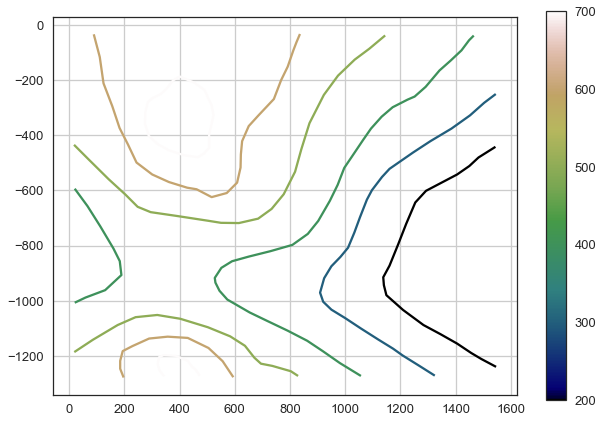

In [3]:
#Plotting
contours.plot(aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

In [4]:
# Interpolating raster
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='rbf', n=100
                             )
raster[:2]

array([[519.52386896, 519.76370486, 520.00510667, ..., 232.32020901,
        232.12696913, 231.93626093],
       [519.42119326, 519.66262125, 519.90562791, ..., 231.81618112,
        231.62345834, 231.43327434]])

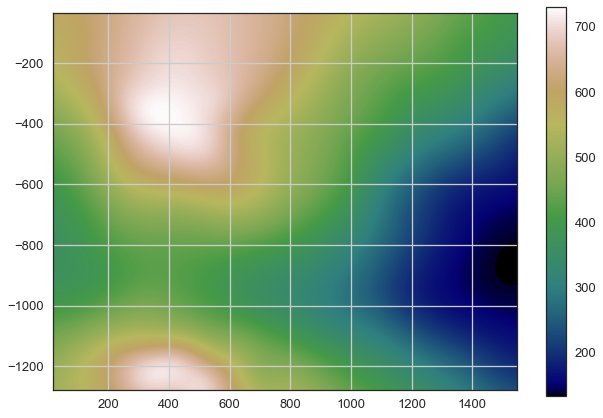

In [5]:
#plotting raster
im = plt.imshow(raster, cmap='gist_earth', origin='lower', extent=extent)
plt.grid()
plt.colorbar(im)

In [6]:
import numpy as np
np.save("bennisson_raster_DEM_04.npy", raster)

In [7]:
# To tiff
gg.raster.save_as_tiff(raster=raster,
                       path= file_path + 'raster.tif',
                       extent=extent,
                       crs='EPSG:4326',
                      )

FileExistsError: The file already exists. Pass overwrite_file=True to overwrite the existing file

## Interfaces

In [9]:
gdf = gpd.read_file(file_path + 'interfaces_point.shp')
dem = rasterio.open(file_path + 'raster.tif')

In [10]:
gdf.head(), dem.read() 

(   id formation                    geometry
 0   1         R   POINT (1127.931 -518.791)
 1   2         R  POINT (1261.543 -1159.685)
 2   3         U     POINT (57.083 -530.782)
 3   4         U    POINT (173.075 -885.855)
 4   5         U    POINT (96.114 -1114.169),
 array([[[616.72158371, 616.91779874, 617.11510059, ..., 378.63973847,
          378.40404655, 378.16952406],
         [616.40448684, 616.60111879, 616.798843  , ..., 378.31333604,
          378.07702658, 377.84188831],
         [616.08693876, 616.28398597, 616.48213087, ..., 377.98718236,
          377.75025191, 377.51449441],
         ...,
         [528.14741925, 528.38202856, 528.61834857, ..., 222.08866781,
          221.92673954, 221.76740465],
         [528.33991642, 528.57261835, 528.80700878, ..., 222.61375924,
          222.45115424, 222.29113791],
         [528.53096398, 528.7617569 , 528.99421629, ..., 223.13969184,
          222.97641381, 222.81571963]]]))

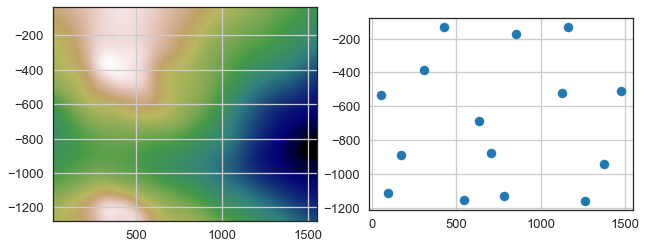

In [11]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent)
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

In [12]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38


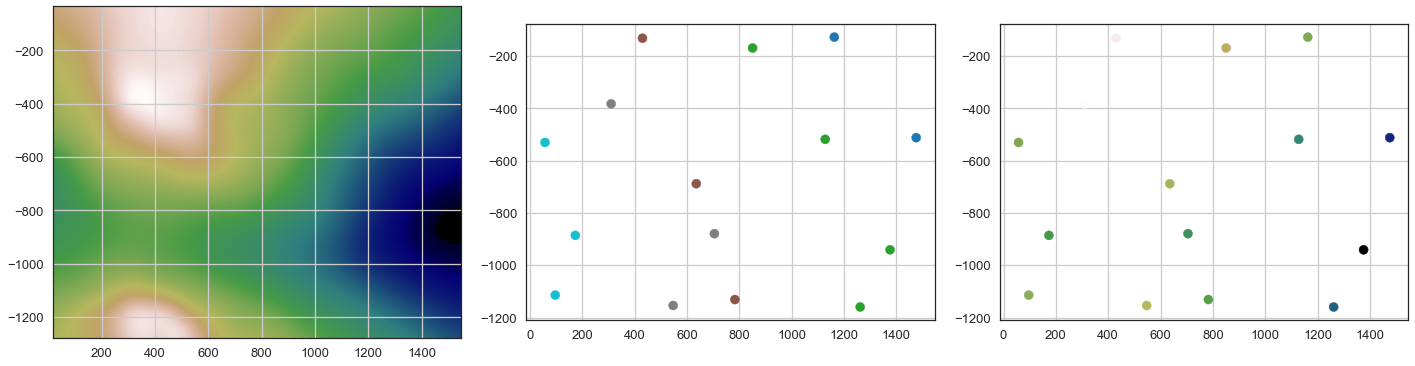

In [13]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent )
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column="formation")
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth')
ax3.grid()

plt.tight_layout()

# Orientations

In [14]:
gdf_or = gpd.read_file(file_path + 'orientation.shp')

In [15]:
gdf_or.head()

,id,formation,Z,geometry
0,1,R,300,"LINESTRING (1150.383 -532.953, 1218.413 -1202...."
1,2,R,200,"LINESTRING (1266.131 -620.896, 1311.341 -1102...."


In [16]:
orientations = gg.vector.calculate_orientations_from_strike_lines(gdf_or)
orientations

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,-44.28,84.35,250.00,POINT (1236.567 -864.749),1.00,R,1236.57,-864.75


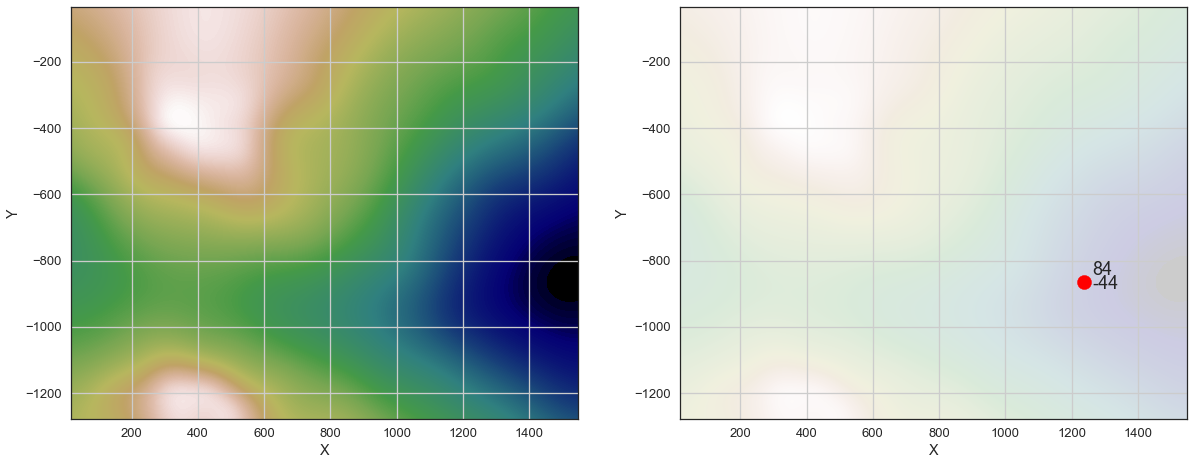

In [17]:
import numpy as np
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2,figsize=(20, 10))
# Plotting the geological map
ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()

# Plotting the geological map
ax2.imshow(dem.read(1), extent=extent, cmap='gist_earth', alpha=0.2)
# Plotting the interfaces on the geological map
ax2.scatter(orientations['X'], orientations['Y'], s=200, color='red')
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]+20,
          s=round(orientations['azimuth'][i])) for i in range(len(orientations))]
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]-20,
          s=round(orientations['dip'][i])) for i in range(len(orientations))]

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()

# All is ready now to create the gempy model

In [18]:
extent = extent #gpd.read_file(file_path + "extent.shp")
base_map = dem
interfaces = gdf_xyz
orientations=orientations

In [19]:
interfaces.head()

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38


In [20]:
orientations.head()

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,-44.28,84.35,250.00,POINT (1236.567 -864.749),1.00,R,1236.57,-864.75


In [21]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

In [22]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Set extent 

In [23]:
geo_data.set_extent(extent[0], extent[1], extent[2], extent[3], 0, 1000)
geo_data.extent

[17, 1548, -1277, -35, 0, 1000]

## Set resolution

In [24]:
geo_data.set_resolution(50,50,50)#25,25,25)
geo_data.resolution

[50, 50, 50]

## Attributes

In [25]:
geo_data.raw_i = interfaces
geo_data.raw_i

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38
5,T,POINT (546.747 -1153.934),546.75,-1153.93,541.20
6,T,POINT (704.584 -879.370),704.58,-879.37,371.75
7,T,POINT (309.868 -383.099),309.87,-383.10,717.58
8,S,POINT (429.531 -132.395),429.53,-132.39,704.62
9,S,POINT (635.209 -688.497),635.21,-688.50,521.39


In [26]:
geo_data.raw_o = orientations
geo_data.raw_o

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,-44.28,84.35,250.00,POINT (1236.567 -864.749),1.00,R,1236.57,-864.75


In [27]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[616.72158371, 616.91779874, 617.11510059, ..., 378.63973847,
        378.40404655, 378.16952406],
       [616.40448684, 616.60111879, 616.798843  , ..., 378.31333604,
        378.07702658, 377.84188831],
       [616.08693876, 616.28398597, 616.48213087, ..., 377.98718236,
        377.75025191, 377.51449441],
       ...,
       [528.14741925, 528.38202856, 528.61834857, ..., 222.08866781,
        221.92673954, 221.76740465],
       [528.33991642, 528.57261835, 528.80700878, ..., 222.61375924,
        222.45115424, 222.29113791],
       [528.53096398, 528.7617569 , 528.99421629, ..., 223.13969184,
        222.97641381, 222.81571963]])

(<Figure size 1440x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1facf3ebac8>)

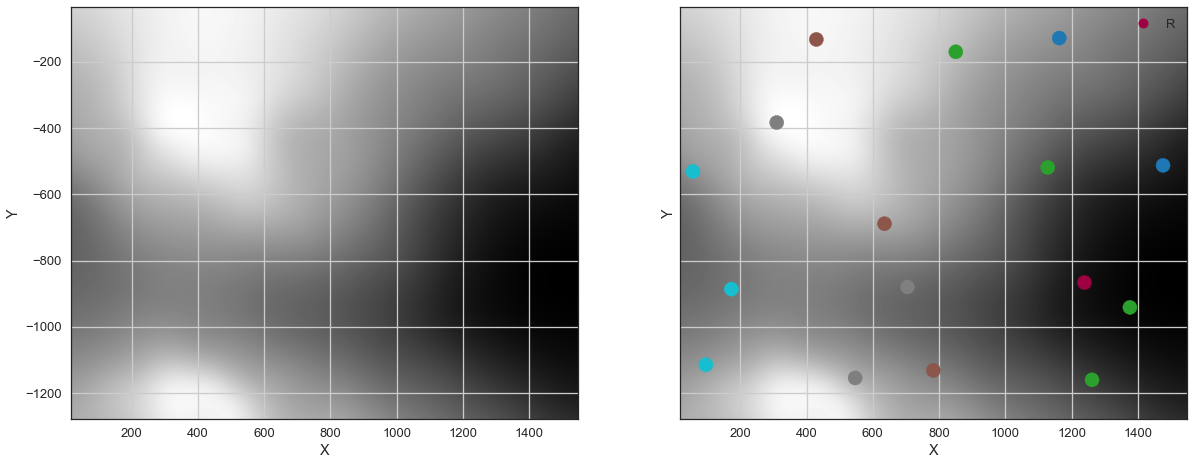

In [28]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=False,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           #cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

In [29]:
geo_data.to_gempy_df(interfaces, 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,0,1127.93,-518.79,318.99,R
1,1,1261.54,-1159.68,255.34,R
2,2,57.08,-530.78,464.60,U
3,3,173.08,-885.85,399.03,U
4,4,96.11,-1114.17,484.38,U
5,5,546.75,-1153.93,541.20,T
6,6,704.58,-879.37,371.75,T
7,7,309.87,-383.10,717.58,T
8,8,429.53,-132.39,704.62,S
9,9,635.21,-688.50,521.39,S


In [30]:
geo_data.to_gempy_df(orientations, 'orientations')
geo_data.orientations

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,1236.57,-864.75,250.00,R,-44.28,84.35,1.00


In [31]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [17, 1548, -1277, -35, 0, 1000],
 'resolution': [50, 50, 50],
 'interfaces':     index       X        Y      Z formation
 0       0 1127.93  -518.79 318.99         R
 1       1 1261.54 -1159.68 255.34         R
 2       2   57.08  -530.78 464.60         U
 3       3  173.08  -885.85 399.03         U
 4       4   96.11 -1114.17 484.38         U
 5       5  546.75 -1153.93 541.20         T
 6       6  704.58  -879.37 371.75         T
 7       7  309.87  -383.10 717.58         T
 8       8  429.53  -132.39 704.62         S
 9       9  635.21  -688.50 521.39         S
 10     10  782.77 -1131.18 420.99         S
 11     11 1375.94  -941.04 136.00         R
 12     12  850.43  -169.71 564.81         R
 13     13 1475.91  -512.43 192.68         Q
 14     14 1162.68  -128.23 463.80         Q,
 'orientations':    index       X       Y      Z formation    dip  azimuth  polarity
 0      0 1236.57 -864.75 250.00         R -44.28    84.35   

In [32]:
geo_data.stack = {"Strat_Series": ('U', 'T', 'S', 'R', 'Q', 'P')}
# geo_data.stack = {"Strat_Series": ('R')}

geo_data.stack

{'Strat_Series': ('U', 'T', 'S', 'R', 'Q', 'P')}

# Gempy Model

In [33]:
import gempy as gp

In [34]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2021-01-28 12:56

In [35]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             #orientations_df = geo_data.orientations,
             #default_values=True
            )

Active grids: ['regular']


Model1  2021-01-28 12:56

In [36]:
geo_model.add_orientations(X=1236.57, Y=-864.75, Z=250, surface='R', orientation = [85,45,1])


,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1236.57,-864.75,250.00,0.70,0.06,0.71,0.01,R


In [37]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         #remove_unused_series=True
                        )
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,R,Strat_Series,1,#015482,1
1,U,Strat_Series,2,#9f0052,2
2,T,Strat_Series,3,#ffbe00,3
3,S,Strat_Series,4,#728f02,4
4,Q,Strat_Series,5,#443988,5
5,basement,Strat_Series,6,#ff3f20,6


In [38]:
geo_model.set_topography()
#    source='gdal', filepath=file_path + 'raster.tif')

[ 800. 1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   32.31      , -1264.58      ,    10.        ],
       [   32.31      , -1264.58      ,    30.        ],
       [   32.31      , -1264.58      ,    50.        ],
       ...,
       [ 1548.        ,   -85.69387755,   874.11775598],
       [ 1548.        ,   -60.34693878,   874.90179989],
       [ 1548.        ,   -35.        ,   877.18214128]])

In [39]:
geo_model.surfaces.df.color[4]="#D2691E"

In [40]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...


C:\Users\Admin\Miniconda3\envs\gemgis_env\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\Admin\Miniconda3\envs\gemgis_env\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\Admin\Miniconda3\envs\gemgis_env\lib\site-packages\theano\scan_module\scan_perform_ext.py:7

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             2210.55
$C_o$           116345.83
drift equations       [3]


In [41]:
sol = gp.compute_model(geo_model, compute_mesh=False)

In [42]:
# not working
#gp.plot_2d(geo_model, section_names=['topography'], show_contours=True)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

In [ ]:
gp.plot_2d(geo_model, direction='y', show_topography=False)

In [ ]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

In [56]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=False, show_lith=False)

In [ ]:
geo_model.save_model_pickle(path='temp.pickle')

# Run in sandbox

In [ ]:
import gempy as gp
geo_model = gp.load_model_pickle('temp.pickle.pickle')
gpsb.geo_model.surfaces.df.color[4]="#D2691E"

In [45]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "fw_projector_calibration.json"
_calibsensor = _calibration_dir + "fw_sensor_calibration.json"

In [46]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="kinect_v2")

c:\users\admin\pycharmprojects\open_ar_sandbox\sandbox\sensor\kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


JSON configuration loaded for sensor.
KinectV2 initialized.


In [47]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


JSON configuration loaded for projector.


Launching server at http://localhost:52972
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [48]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
sensor2 = Sensor(calibsensor=_calibsensor, name="dummy")
aruco = MarkerDetection(sensor=sensor2)

JSON configuration loaded for sensor.
DummySensor initialized.
Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


In [49]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)
# Start the thread 
main.run()

Thread started or resumed...


In [50]:
main.widget_plot_module()

Thread stopped. 
Thread started or resumed... 
Active grids: ['regular' 'topography' 'sections'] 
Active grids: ['regular' 'topography' 'sections'] 
Thread stopped.

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colormap', value=True)
                [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                [3] Column
                    [0] Markdown(str)
                    [1] WidgetBox
                        [0] Checkbox(name='Show relief shading', value=True)
                        [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                        [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                        [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
            [1] Column
                [0] Markdown(str)
                [1] Checkbox(name='Active contours', value=True)
                [2] Checkbox(name='Automatic levels f...)
                [3] Markdown(str)
                [4] WidgetBox
                    [0] Checkbox(name='Show major contours', value=True)
                    [1] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                    [2] Checkbox(name='Show minor contours', value=True)
                    [3] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                    [4] Checkbox(name='Show contours label', value=True)
                    [5] IntInput(name='set a contour l..., value=15, value_throttled=15)
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Aruco Detection', value=True)
                [2] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] WidgetBox
                            [0] Checkbox(name='Show aruco location', value=True)
                            [1] Checkbox(name='Show aruco id', value=True)
                            [2] Checkbox(name='Show line connecting a...)
                            [3] ColorPicker(name='Color', value='#ff0000')
                        [1] WidgetBox
                            [0] Markdown(str)
                            [1] Row
                                [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                            [2] Button(button_type='success', name='Add dummy aruco dict')
                            [3] Button(button_type='warning', name='Clear aruco dict')
            [1] Column
                [0] Markdown(str)
                [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                [2] Checkbox(name='Check changes in fame')
                [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                [4] Button(button_type='warning', name='Clear axes from p...)
                [5] Markdown(str)

In [51]:
from sandbox.modules import gempy
gpsb= gempy.gempy_module.GemPyModule(geo_model = geo_model, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [1.5310000000000001, 1.5525, 3.8461538461538463]
the shown extent is [17.0, 1548.0, -1277.0, -35.0] 
Active grids: ['regular' 'topography' 'sections']


In [52]:
main.add_module(name='gempy', module=gpsb)

module gempy added to modules


In [ ]:
gpsb._model_extent

In [ ]:
gpsb.show_hillshades=False

In [ ]:
main.run()

In [ ]:
main.stop()
fig = projector.figure
#main.run()
fig

In [ ]:
fig.savefig("bennisson_DEM_04_modified_topo.png", dpi=500)

In [ ]:
aruco.set_aruco_position({4:[46,96], 7:[206,142]})

In [ ]:
aruco._all_dict_position

In [ ]:
main.sb_params.get('marker')

In [54]:
#For the hacked cross-section
main.run()
aruco.set_aruco_position({4:[46,96], 7:[206,142]})
main.stop()
import numpy as np
gpsb.modelspace_arucos.box_x = np.array([320, 1230])
gpsb.modelspace_arucos.box_y = np.array([-750, -440])
print(gpsb.modelspace_arucos)
aruco.plot_aruco(ax=projector.ax, df_position=gpsb.modelspace_arucos)
projector.trigger()

Thread started or resumed...
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Thread stopped.
   box_x  box_y  is_inside_box  box_z
4    320   -750           True 731.49
7   1230   -440           True 483.33


True

In [ ]:
gpsb.

In [ ]:
gp.plot_2d(gpsb.geo_model, direction='x', show_topography=True, show_data=False)

In [ ]:
gp.plot_3d(gpsb.geo_model)#, image=False, show_topography=False,
                 #plotter_type='background', notebook=False, show_lith=True)

In [ ]:
aruco.delete_aruco_position()

In [ ]:
aruco.set_aruco_position({4:[46,96], 7:[206,142]})
aruco.plot_aruco(ax=projector.ax, df_position=gpsb.modelspace_arucos)

In [ ]:
projector.trigger()

In [ ]:
projector.ax.get_ylim()

In [ ]:
gpsb.show_widgets()

In [ ]:
gpsb.show_cross_section("Aruco_section")

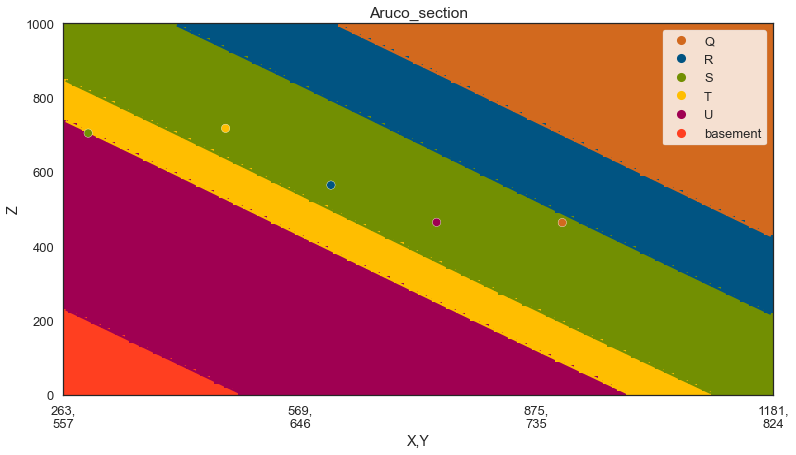

In [63]:
figure = gp.plot_2d(gpsb.geo_model, section_names=["Aruco_section"], show_data=True, show_topography=False,
                                            show=False)
figure.fig.axes[0].set_aspect(0.5)

In [65]:
figure.fig.savefig("bennisson_crop_section_extended.png", dpi=500)

# Loading

In [ ]:
from sandbox.modules import LoadSaveTopoModule
loadsave = LoadSaveTopoModule(extent=sensor.extent)


In [ ]:
main.add_module('loadsave', loadsave)

In [ ]:
loadsave.loadTopo('bennisson_raster_DEM_04_hacked.npz')

In [ ]:
loadsave.show_widgets()

In [ ]:
plt.imshow(loadsave.relative_topo, cmap="gist_earth")
plt.colorbar()

In [ ]:
dem = np.load("bennisson_raster_DEM_04.npz")

In [ ]:
plt.imshow(dem["arr_1"]/600-0.75, cmap="gist_earth")
plt.colorbar()


In [ ]:
is_it = dem["arr_1"]/600-0.75
import skimage.transform
topo_super_res = skimage.transform.resize(is_it, sensor.get_frame().shape,
    order=3,
    mode='edge',
    anti_aliasing=True, preserve_range=False)
plt.imshow(topo_super_res, cmap="gist_earth")
plt.colorbar()

In [ ]:
np.savez("bennisson_raster_DEM_04_hacked.npz", topo_super_res, topo_super_res)

In [ ]:
dem2 = np.load("bennisson_raster_DEM_04_hacked.npz")

In [ ]:
plt.imshow(dem2["arr_1"], cmap="gist_earth")
plt.colorbar()


In [ ]:
def normalize_topography(frame, extent, min_height, max_height):
    """
    Change the max an min value of the frame and normalize accordingly
    Args:
        frame: sensor frame
        extent: sensor extent
        max_height: Target max height
        min_height: Target min height

    Returns:
        normalized frame and new extent

    """
    # first position the frame in 0 if the original extent is not in 0
    if extent[-2] != 0:
        displ = 0 - extent[-2]
        frame = frame - displ
    # calculate how much we need to move the frame so the 0 value correspond to the approximate 0 in the frame
    # min_height assuming is under 0.

    if min_height < 0:
        displace = min_height * (-1) * (extent[-1] - extent[-2]) / (max_height - min_height)
        frame = frame - displace
        extent[-1] = extent[-1] - displace
        extent[-2] = extent[-2] - displace
        # now we set 2 regions. One above sea level and one below sea level. So now we can normalize these two
        # regions above 0
        frame[frame > 0] = frame[frame > 0] * (max_height / extent[-1])
        # below 0
        frame[frame < 0] = frame[frame < 0] * (min_height / extent[-2])
    elif min_height > 0:
        frame = frame * (max_height - min_height) / (extent[-1] - extent[-2])
        frame = frame + min_height  # just displace all up to start in min_height
    elif min_height == 0:
        frame = frame * max_height / (extent[-1])
    else:
        raise AttributeError
    extent[-1] = max_height  # self.plot.vmax = max_height
    extent[-2] = min_height  # self.plot.vmin = min_height
    return frame, extent

In [ ]:
frame = dem["arr_1"]
new_frame, extent_new = normalize_topography(frame, [0,0,0,0,frame.min(),frame.max()], -100,45)

In [ ]:
plt.imshow(new_frame, cmap="gist_earth")
plt.colorbar()


In [ ]:
import skimage.transform
topo_super_res = skimage.transform.resize(new_frame, sensor.get_frame().shape,
    order=3,
    mode='edge',
    anti_aliasing=True, preserve_range=False)
plt.imshow(topo_super_res, cmap="gist_earth")
plt.colorbar()

In [ ]:
np.savez("bennisson_raster_DEM_04_hacked.npz", topo_super_res, topo_super_res)

In [ ]:
raster.shape

In [ ]:
raster.min(), raster.max()

In [ ]:
import skimage.transform
import matplotlib.pyplot as plt
def normalize_topography(dem, target_extent):
    """
    Normalize any size of numpy array to fit the sandbox frame.
    Useful when passing DEM with resolution bigger than sandbox sensor.
    Args:
        dem:
        target_extent: [minx, maxx, miny, maxy, vmin, vmax] ->
        [0, frame_width, 0, frame_height, vmin_sensor, vmax_sensor]
    Returns:
         normalized frame
    """
    # Change shape of numpy array to desired shape
    topo_changed = skimage.transform.resize(dem,
                                            (target_extent[3], target_extent[1]),
                                            order=3,
                                            mode='edge',
                                            anti_aliasing=True,
                                            preserve_range=False)

    topo_min = topo_changed.min()
    topo_max = topo_changed.max()
    # when the min value is not 0
    if topo_min != 0:
        topo_changed = topo_changed - topo_min
    
    topo_changed = topo_changed * (target_extent[-1] - target_extent[-2]) / (topo_max - topo_min)
    
    mean_height = topo_changed.mean()
    topo_changed = topo_changed - mean_height
    relative_topo = topo_changed / (target_extent[-1] - target_extent[-2])
    #    frame = frame + min_height
    # calculate how much we need to move the frame so the 0 value correspond to the approximate 0 in the frame
    # min_height assuming is under 0.
    #if topo_min < 0:
    #    displace = target_extent[-2] * (-1) * (target_extent[-1] - target_extent[-2]) / (topo_max - topo_min)
    #    topo_changed = topo_changed - displace
    #    extent[-1] = extent[-1] - displace
    #    extent[-2] = extent[-2] - displace
    #    # now we set 2 regions. One above sea level and one below sea level. So now we can normalize these two
    #    # regions above 0
    #    frame[frame > 0] = frame[frame > 0] * (max_height / extent[-1])
    #    # below 0
    #    frame[frame < 0] = frame[frame < 0] * (min_height / extent[-2])
    #elif min_height > 0:
    #    frame = frame * (max_height - min_height) / (extent[-1] - extent[-2])
    #    frame = frame + min_height  # just displace all up to start in min_height
    #elif min_height == 0:
    #    frame = frame * max_height / (extent[-1])
    return topo_changed

In [ ]:
fig, [ax1,ax2]=plt.subplots(1,2)
col1 = ax1.imshow(raster)
fig.colorbar(col1, ax=ax1)
new_frame=normalize_topography(raster.copy(), [0, 267,0,214, 0, 260])
new_frame.shape

col2 = ax2.imshow(new_frame)
fig.colorbar(col2, ax=ax2)

In [ ]:
temp = "nono.npz"

In [ ]:
temp.split(".")[-1]

In [ ]:
import numpy as np
np.save("bennisson_raster_DEM_04_hacked.npy", raster)

In [ ]:
gpsb.geo_model.surfaces